In [172]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('TorontoListings.csv') #Importing Local Listings File to Train Model
df.head()

,Price,Beds,Baths
0,779900,3,2
1,799999,3,1
2,799900,2,2
3,1200000,4,2
4,668800,1,1


Training Inputs: (1276, 2)
Training Outputs: (1276,)


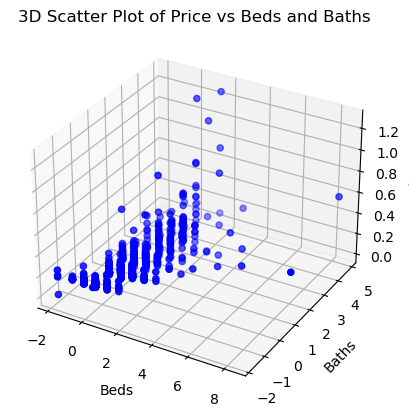

In [173]:
price_data = df["Price"] #Getting price data into variable
beds_data = df["Beds"] #Getting bed data into variable
baths_data = df["Baths"] #Getting bath data into variable
x1 = beds_data.to_numpy(); x2 = baths_data.to_numpy(); y = price_data.to_numpy(); #Converting data to arrays
xv = np.column_stack((x1,x2))
scaler = StandardScaler()
xv = scaler.fit_transform(xv)
print(f"Training Inputs: {xv.shape}"); print(f"Training Outputs: {y.shape}")

x1 = xv[:, 0]  # Beds
x2 = xv[:, 1]  # Baths
y = y           # Price

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x1, x2, y, color='b', marker='o')

# Labels
ax.set_xlabel('Beds')
ax.set_ylabel('Baths')
ax.set_zlabel('Price')

# Title
ax.set_title('3D Scatter Plot of Price vs Beds and Baths')

# Show the plot
plt.show()

In [174]:
w = np.array([300000, 300000], dtype=np.float64)
b = 400000 #assigning arbitrary values for our linear function, the structure is important, values aren't

def gradientComputation(x, y, w, b): #computing dj/dw and dj/db (gradient vector)
    m,n = x.shape; dj_dw = np.zeros(n); dj_db = 0; 
    
    for i in range (0,m): 
        error = np.dot(x[i], w) + b - y[i] #computes error term
        for j in range (0,n): 
            dj_dw[j] = dj_dw[j] + (1/m)*(error)*(x[i,j]) #iterates through and finds total gradient for w
        dj_db = dj_db + (1/m)*(error) 
        
    return(dj_dw , dj_db)


Iteration: 0 Cost: 663190530373.7955
Iteration: 1000 Cost: 268706407722.57077
Iteration: 2000 Cost: 268480926035.42416
Iteration: 3000 Cost: 268479465314.5882
Iteration: 4000 Cost: 268479455851.68414
Iteration: 5000 Cost: 268479455790.38202
Iteration: 6000 Cost: 268479455789.9847
Iteration: 7000 Cost: 268479455789.98227
Iteration: 8000 Cost: 268479455789.98212
Iteration: 9000 Cost: 268479455789.98126
Iteration: 10000 Cost: 268479455789.98172
Final w: [ 28545.80654507 776655.27502362] Final b: 1235288.7735109604


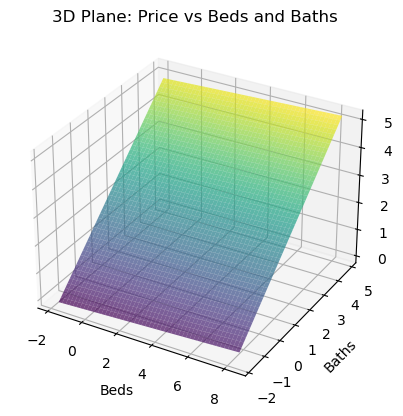

In [175]:
def gradientDescent(x, y, w1, b1):
    a = 0.01 #learning rate alpha
    iterations = 10001 #Number of times the gradient descent will be computed plus 1
    m,n = x.shape
    for i in range (0,iterations): 
        dj_dw, dj_db = gradientComputation(x,y,w1,b1)
        w1 = w1 - a*dj_dw
        b1 = b1 - a*dj_db
        if(i%1000 == 0):
            cost = 0
            for j in range (0,m):
                cost += (1/(2*m))*(np.dot(x[j],w1) + b1 - y[j])**2 
            print(f"Iteration: {i} Cost: {cost}")
    return(w1, b1)

w,b = gradientDescent(xv,y,w,b)
print(f"Final w: {w} Final b: {b}")

x1_vals = np.linspace(min(x1), max(x1), 50)  # Generate values for x1 (Beds)
x2_vals = np.linspace(min(x2), max(x2), 50)  # Generate values for x2 (Baths)
X1, X2 = np.meshgrid(x1_vals, x2_vals)  # Create meshgrid

# Calculate the corresponding y values based on the linear equation
Y = w[0] * X1 + w[1] * X2 + b  # Plane equation y = w0*x1 + w1*x2 + b

# Plotting the plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (plane)
ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.7)

# Labels
ax.set_xlabel('Beds')
ax.set_ylabel('Baths')
ax.set_zlabel('Price')

# Title
ax.set_title('3D Plane: Price vs Beds and Baths')

# Show the plot
plt.show()

In [187]:
bed = float(input("please input the number of bedrooms in your house: "))
bath = float(input("please input the number of bathrooms in your house: "))
price = bed*(w[0]+w[1])/2 + bath*(w[0]+w[1])/2.8 + b/2
formatted = f"${price:,.2f}"
print(f" {formatted} would be a good price to list your house for")

please input the number of bedrooms in your house: 5
please input the number of bathrooms in your house: 5
 $3,493,362.54 would be a good price to list your house for
